In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
from PTTLibrary import PTT

In [3]:
import json
def read_settings():
    with open('./settings.json') as file:
        setting = json.load(file)
    return setting

In [ ]:
setting=read_settings()

In [4]:
PTTBot = PTT.Library()#LogLevel=PTT.LogLevel.DEBUG
try:
    PTTBot.login(
        ID=setting.get('ID'),
        Password=setting.get('Password'),
        KickOtherLogin=True
    )
except PTT.Exceptions.LoginError:
    PTTBot.log('登入失敗')
    sys.exit()
PTTBot.log('登入成功')

PTT Library v 0.8.13
Developed by PTT CodingMan
[0905 18:31:48][資訊] 繁體中文語言模組 [初始化]
[0905 18:31:48][資訊] 連線核心 [初始化]
[0905 18:31:48][資訊] 批踢踢函式庫 v 0.8.13 [初始化]
[0905 18:31:48][資訊] 登入帳號 [bigtongue]
[0905 18:31:48][資訊] 連線核心 [啟動]
[0905 18:31:48][資訊] 連線批踢踢 [WebSocket]
[0905 18:31:48][資訊] 批踢踢訊息 [登入中，請稍候]
[0905 18:31:49][資訊] 批踢踢訊息 [剔除其他登入]
[0905 18:31:54][資訊] 批踢踢訊息 [請按任意鍵繼續]
[0905 18:31:54][資訊] 批踢踢訊息 [登入成功]
[0905 18:31:54][資訊] 登入成功


In [5]:
Board='Stock'
SearchType=PTT.PostSearchType.Keyword
Condition='盤中閒聊'
Index = PTTBot.getNewestIndex(
        PTT.IndexType.Board,
        Board,
        SearchType,
        SearchCondition=Condition,
    )
print(f'{Board} 最新文章編號 {Index}')
Post = PTTBot.getPost(
    Board,
    PostIndex=Index,
    SearchType=SearchType,
    SearchCondition=Condition,
)

print('標題:')
print(Post.getTitle())
print('內文:')
print(Post.getContent())
print('=' * 50)

Stock 最新文章編號 1162
標題:
[閒聊] 2019/09/05 盤中閒聊
內文:
==============108/09/05台股資訊重點整理，供股民做投資參考=============
台  股  10657.31  ▲99.10(+0.94%)1050.79億
台指08 10644      ▲101(+0.96%) 86,412口
盤後08 10714    ▲70 (+0.66%)30,493口
摩台指 395.6     ▲3.6 (+0.92%) 
台指期未平倉口數 自營商 -7,035(-1,002) 投信 -20,643(-421) 外資 +51,087(+4,403)
台指選未平倉口數 自營商 +5,773(+45,939) 投信 -1,620(-3) 外資 +40,789(-2,738)
最大未平倉量                Call 10800 Put 10650
最大未平倉變化量  Call 10800 Put 10650
 ------------------------------------------------------------------
道瓊工業   26355.47 ▲237.45(+0.91%)
那斯達克    7976.88  ▲102.72(+1.30%)
標普500     2947.78  ▲31.51(+1.08%)
費城半導體  1519.55  ▲41.23(+2.79%)


--


In [6]:
push_content_list = []
for push in Post.getPushList():
    push_content = push.getContent()
    push_content_list.append(push_content)
print(f'{len(Post.getPushList())}則推文')

1743則推文


## 預處理

In [7]:
import string
from zhon.hanzi import punctuation
push_content_list = [s.replace(' ', '') for s in push_content_list]
push_content_list = [s for s in push_content_list if s]
push_content_list = [''.join(c for c in s if c not in string.punctuation) for s in push_content_list]
push_content_list = [''.join(c for c in s if c not in punctuation) for s in push_content_list]

In [8]:
words_list = []
import jieba
jieba.load_userdict('user_dict.txt')
for push_content in push_content_list:
    words = jieba.lcut(push_content, cut_all=False)
    words_list = words_list + words

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\BIGTON~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.565 seconds.
Prefix dict has been built succesfully.


In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
font = "c:\windows\Fonts\msjh.ttc"
wc = WordCloud(background_color="white",    #   背景顏色
               max_words=200,              #   最大詞數
               max_font_size=200,           #   顯示字體的最大值
               stopwords=STOPWORDS,   #   使用內置的屏蔽詞，再添加一個
               font_path=font,              #   解決顯示口字型亂碼問題，可進入C:/Windows/Fonts/目錄更換字體
               prefer_horizontal=10,
               width=1280,
               height=720)        #   調整詞雲中字體水平和垂直的多少

In [10]:
import matplotlib.pylab as plt
%matplotlib inline

In [11]:
wc.generate(' '.join(words_list))              #   須為字串且每個分詞以空白相隔

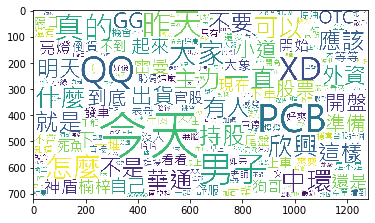

In [12]:
plt.imshow(wc)

In [13]:
fig_path = './text.png'
wc.to_file(fig_path)

In [14]:
import jieba.analyse
jieba.analyse.extract_tags(' '.join(words_list), topK=20, withWeight=False, allowPOS=())

['2367',
 '今天',
 '99',
 'QQ',
 '3037',
 '2316',
 'XD',
 '2313',
 'PCB',
 '怎麼',
 '男子',
 '中環',
 '欣興',
 '這樣',
 '什麼',
 '2337',
 '應該',
 '華通',
 '外資',
 '出貨']

In [15]:
jieba.analyse.textrank(' '.join(words_list), topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))

['男子',
 '大家',
 '主力',
 '出貨',
 '準備',
 '持股',
 '開盤',
 '楠梓',
 '空軍',
 '原油',
 '股票',
 '開始',
 '官股',
 '應該',
 '開高',
 '尾盤',
 '外資',
 '亮燈',
 '恥骨',
 '大象']